In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [4]:
import os
os.getcwd()


'C:\\Users\\DIVYANKA\\Downloads\\Amazon_Prime_Capstone'

In [5]:
titles = pd.read_csv("data/titles.csv")
credits = pd.read_csv("data/credits.csv")


In [6]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [7]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [8]:
titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [9]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [10]:
titles['imdb_score'] = titles['imdb_score'].fillna(titles['imdb_score'].mean())
titles['runtime'] = titles['runtime'].fillna(titles['runtime'].median())


In [11]:
titles.groupby('type')[['imdb_score', 'tmdb_popularity']].mean()


,imdb_score,tmdb_popularity
type,,
MOVIE,5.820003,5.760095
SHOW,6.957621,14.514069


In [12]:
titles_exploded = titles.copy()
titles_exploded['genres'] = titles_exploded['genres'].str.split(',')
titles_exploded = titles_exploded.explode('genres')

genre_rating = (
    titles_exploded
    .groupby('genres')['imdb_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

genre_rating


genres
 'reality'           7.521429
['sport'             7.185714
['documentation'     7.082514
['history']          6.900000
 'reality']          6.885291
['sport']            6.850558
 'history']          6.840012
['documentation']    6.810400
 'history'           6.765475
['reality'           6.764567
Name: imdb_score, dtype: float64

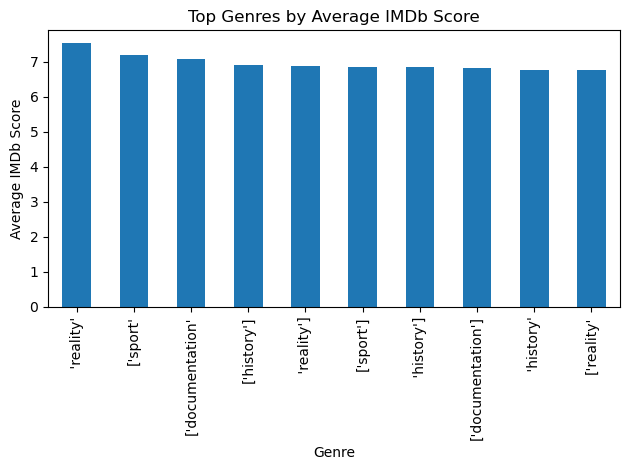

In [13]:
genre_rating.plot(kind='bar', title='Top Genres by Average IMDb Score')
plt.ylabel('Average IMDb Score')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()
